<h1 style="text-align: center; color: violet; font-family: 'Arial', sans-serif; font-size: 36px; font-weight: bold; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">Quora Question Pairs 📚</h1>


# <span style='color:indigo'>1.Introduction  🚀:</span>

Welcome to my Kaggle notebook where we embark on a journey to unravel the intricacies of a natural language processing problem posed by **Quora**, the platform where knowledge meets curiosity. Quora, Quora is a place to gain and share knowledge. It's a platform to ask **questions** and connect with people who contribute unique insights and quality answers. . With over **100 million monthly visitors** seeking and sharing knowledge on diverse topics, Quora thrives as a vibrant community fostering intellectual exchange.

The challenge we confront is rooted in the platform's vast user engagement. As questions pour in, the occurrence of similar inquiries is inevitable. This redundancy poses a significant hurdle, compelling seekers to navigate through multiple versions of essentially the same question and burdening writers with repeated responses.

Quora, recognizing the importance of addressing this issue, currently employs a **Random Forest model** to identify duplicate questions. However, the dynamic nature of language and user-generated content demands more sophisticated solutions. In this Kaggle competition, we are summoned to apply advanced natural language processing techniques to classify whether pairs of questions are duplicates.


Throughout this notebook, we will delve into the intricacies of the problem, meticulously analyze the provided data, and deploy a diverse array of **machine learning and deep learning models**. As we navigate this exploration, we will leverage cutting-edge solutions such as **BERT** and **Word2Vec** to push the boundaries of natural language understanding and classification.

Join me in this intellectual endeavor as we employ data science techniques to optimize the question and answer ecosystem on Quora, making knowledge acquisition and sharing an even more enriching experience for all participants. 📊🧠🔍🌐💡🤖📚👩‍💻🚀


# <span style="color:indigo">2. Import Packages📊</span>


In [1]:
!pip install seaborn wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # We use regular expressions for data cleaning
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)

from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import jaccard_score
from nltk.metrics import edit_distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")


# <span style='color:indigo'>3.Exploratory Data Analysis : </span>


In this section, we dive into the Quora dataset to gain valuable insights📊 and better understand the characteristics of our data. The dataset consists of four columns: `id`, `question1`, `question2`, and `is_duplicated`, where `is_duplicated` indicates whether the two questions are related or not.

Our EDA journey will encompass a range of analyses, including:

1. **Data Overview:** We'll start by examining the basic structure of the dataset, exploring the first few rows to get a sense of the data.

2. **Data Distribution:** We'll investigate the distribution of the target variable, `is_duplicated`, to understand the balance between duplicated and non-duplicated question pairs.

3. **Text Analysis:** We'll perform text-based analyses on `question1` and `question2`, exploring word frequencies, common phrases, and any notable patterns.

4. **Correlation Analysis:** We'll explore potential correlations between features and the target variable to identify any initial trends.

5. **Data Cleaning:** If necessary, we'll address any missing values or outliers, ensuring our data is prepared for modeling.

By the end of this EDA section, we aim to have a comprehensive understanding of the Quora dataset, laying the groundwork for the subsequent steps in our analysis and modeling pipeline.


## <span style='color:BlueViolet'>3.1.Data Overview : </span>

In [2]:
Quora = pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')


In [3]:
print(Quora.isna().sum())
Quora.dropna(inplace=True)
Quora

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket programming language of the latest version?,How many keywords are there in PERL Programming Language in the latest version?,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,"What is the approx annual cost of living while studying in UIC Chicago, for an Indian student?","I am having little hairfall problem but I want to use hair styling product. Which one should I prefer out of gel, wax and clay?",0


The Quora dataset comprises `404,289` rows and `six columns`, providing a rich source of information for natural language processing tasks. Here's a brief description of each column:

1. **id:** A unique identifier for each row in the dataset.

2. **qid1:** The identifier for the first question in a question pair.

3. **qid2:** The identifier for the second question in a question pair.

4. **question1:** The text of the first question in a pair.

5. **question2:** The text of the second question in a pair.

6. **is_duplicate:** A binary indicator (0 or 1) that denotes whether the two questions in a pair are considered duplicates (1) or not (0).

This huge dataset is particularly useful for tasks related to duplicate question identification, making it valuable for exploring natural language processing techniques and machine learning models.

## <span style='color:BlueViolet'>3.2.Data Distribution : </span>

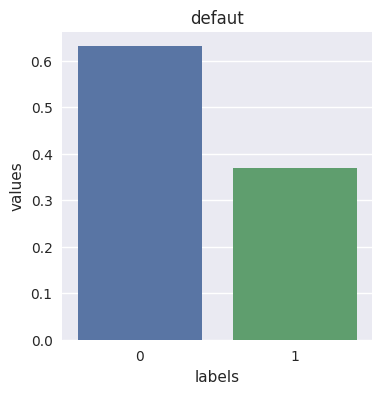

In [25]:
temp = Quora.is_duplicate.value_counts()
df_class = pd.DataFrame({'labels': temp.index,
                   'values': temp.values/len(Quora)})
plt.figure(figsize = (4,4))
plt.title('defaut')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df_class)
locs, labels = plt.xticks()
plt.show()

The data is well balanced, with a percentage of `64%` of non-duplicate questions and `36%` of duplicate ones.

## <span style='color:BlueViolet'>3.2.Text Analysis: </span>

### 3.2.1.Word Cloud :

Before diving deeper into the analysis, some questions need answers:
1. What are the most frequently occurring words in each question? Do they differ over the variable is_duplicate? <br>
2. Are there specific terms that stand out in the duplicate word clouds? <br>
3. Do you observe differences in the prominent terms between duplicate and non-duplicate clouds?

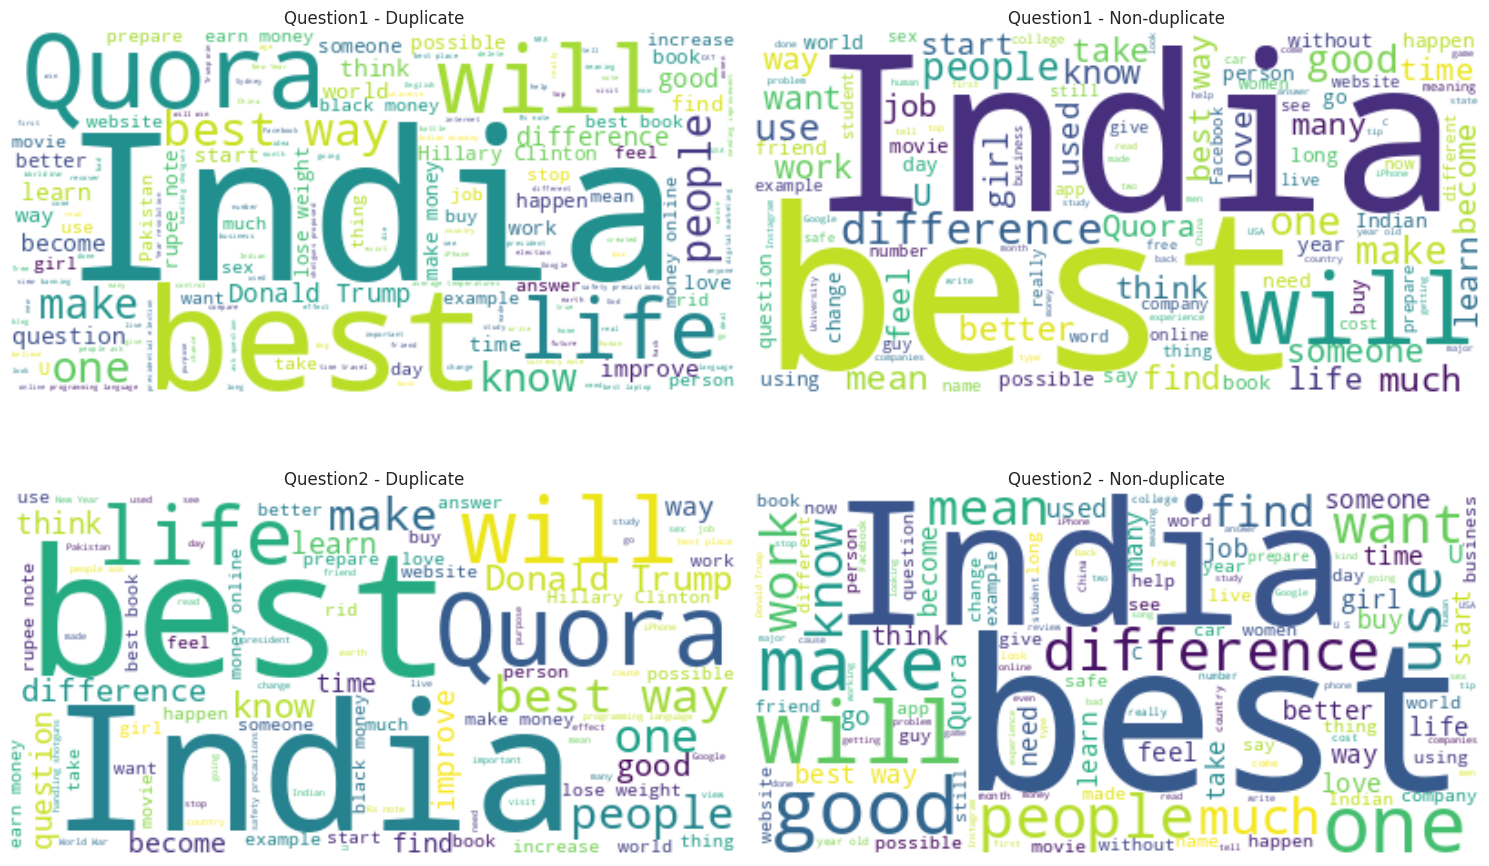

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and plot word clouds
def generate_wordcloud(data_q1_duplicate, data_q1_non_duplicate, data_q2_duplicate, data_q2_non_duplicate):
    # Generate word clouds for question1 and question2
    wordcloud_q1_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q1_duplicate.astype(str)))
    wordcloud_q1_non_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q1_non_duplicate.astype(str)))
    wordcloud_q2_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q2_duplicate.astype(str)))
    wordcloud_q2_non_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q2_non_duplicate.astype(str)))

    # Plot the Word Clouds in a 2x2 subplot
    plt.figure(figsize=(15, 10))

    # Plot for question1 and is_duplicate = 1
    plt.subplot(2, 2, 1)
    plt.imshow(wordcloud_q1_duplicate, interpolation='bilinear')
    plt.title('Question1 - Duplicate')
    plt.axis('off')

    # Plot for question1 and is_duplicate = 0
    plt.subplot(2, 2, 2)
    plt.imshow(wordcloud_q1_non_duplicate, interpolation='bilinear')
    plt.title('Question1 - Non-duplicate')
    plt.axis('off')

    # Plot for question2 and is_duplicate = 1
    plt.subplot(2, 2, 3)
    plt.imshow(wordcloud_q2_duplicate, interpolation='bilinear')
    plt.title('Question2 - Duplicate')
    plt.axis('off')

    # Plot for question2 and is_duplicate = 0
    plt.subplot(2, 2, 4)
    plt.imshow(wordcloud_q2_non_duplicate, interpolation='bilinear')
    plt.title('Question2 - Non-duplicate')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Separate data for duplicate and non-duplicate questions
duplicate_data_q1 = Quora[Quora['is_duplicate'] == 1]['question1']
non_duplicate_data_q1 = Quora[Quora['is_duplicate'] == 0]['question1']
duplicate_data_q2 = Quora[Quora['is_duplicate'] == 1]['question2']
non_duplicate_data_q2 = Quora[Quora['is_duplicate'] == 0]['question2']

# Generate and plot word clouds for 'question1' and 'question2'
generate_wordcloud(duplicate_data_q1, non_duplicate_data_q1, duplicate_data_q2, non_duplicate_data_q2)


From these word clouds, we recognize a lot of similarities in the vocabulary used in the two questions. The most common vocabulary terms contain the words: India, Best,Best ,Quora ,Will ,Question ,difference Donald Trump, and Life.<br>
The jargon remains the same as we analyze the duplicates and non-duplicates (over the column line).<br>
But from the most commonly used words, we find that our text seems clean and doesn't need processing (even though it is less messy, which is not a problem because the frequency of messy words is less).

### 3.2.2.Text Length Distribution :

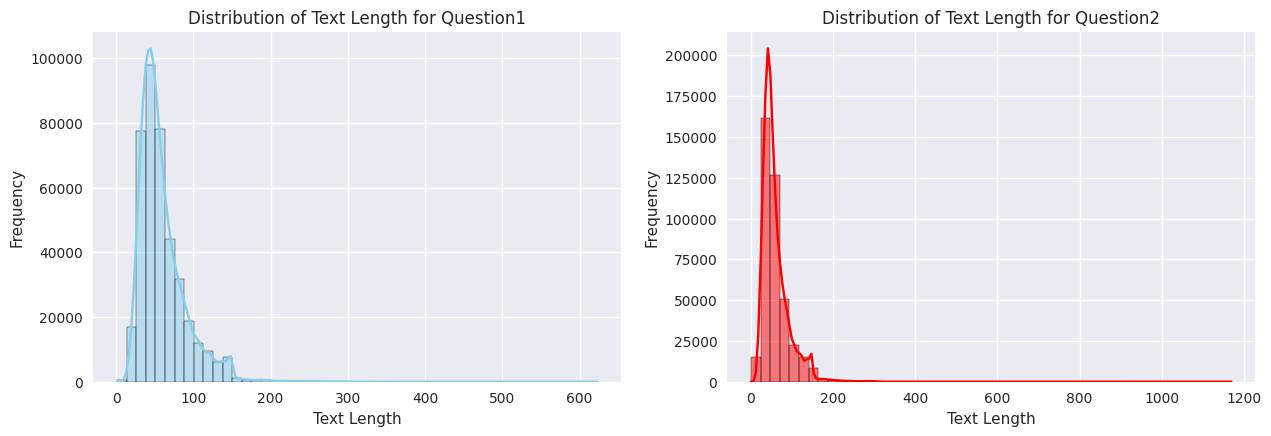

In [6]:
# Text length distribution for question1
plt.figure(figsize=(15 ,10))
plt.subplot(2,2,1)
sns.histplot(data=Quora, x=Quora['question1'].astype('str').apply(len), bins=50, kde=True, color='skyblue')
plt.title('Distribution of Text Length for Question1')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
# Text length distribution for question2
plt.subplot(2,2,2)
sns.histplot(data=Quora, x=Quora['question2'].astype('str').apply(len), bins=50, kde=True, color='red')
plt.title('Distribution of Text Length for Question2')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In examining the KDE plot for the lengths of 'question1' and 'question2', a striking similarity emerges in the distribution, with both ranging from 0 to 150 and 0 to 180, respectively. Notably, both plots exhibit a distinct peak within the first two bins, indicating a concentration of questions within a relatively shorter length range. This close alignment in distribution suggests a degree of uniformity in the lengths of questions, with a prevalent trend towards concise queries.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams_q1 = vectorizer.fit_transform(Quora['question1'])

# Get feature names (bigrams)
feature_names = vectorizer.get_feature_names_out()

top_bigrams = pd.DataFrame(bigrams_q1.sum(axis=0).tolist()[0], index=feature_names, columns=['Count'])
top_bigrams_q1 = top_bigrams.sort_values(by='Count', ascending=False).head(20)
bigrams_q2 = vectorizer.fit_transform(Quora['question2'])
feature_names = vectorizer.get_feature_names_out()
top_bigrams = pd.DataFrame(bigrams_q2.sum(axis=0).tolist()[0], index=feature_names, columns=['Count'])
top_bigrams_q2 = top_bigrams.sort_values(by='Count', ascending=False).head(20)


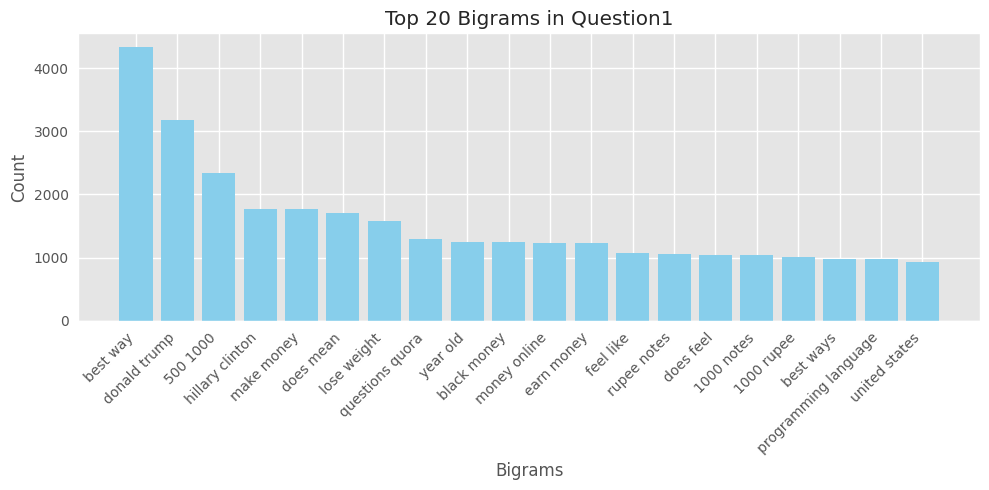

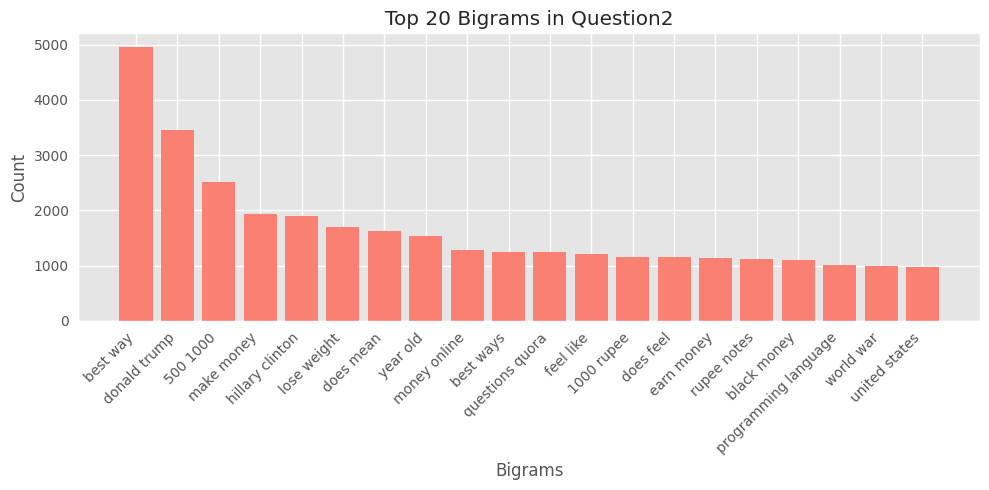

In [8]:
# Set the style for the plots
plt.style.use('ggplot')

# Plot histograms for top bigrams in question1
plt.figure(figsize=(10,5))
plt.bar(top_bigrams_q1.index, top_bigrams_q1['Count'], color='skyblue')
plt.title('Top 20 Bigrams in Question1')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot histograms for top bigrams in question2
plt.figure(figsize=(10,5))
plt.bar(top_bigrams_q2.index, top_bigrams_q2['Count'], color='salmon')
plt.title('Top 20 Bigrams in Question2')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In exploring the top 20 bigrams in **question1** and **question2**, a remarkable consistency emerges with the presence of the same 5 bigrams appearing in identical order. This shared sequence indicates a recurring language structure common to both sets of questions. Notably, while the overall bigram patterns align closely, there are subtle differences in frequencies. Some bigrams exhibit higher occurrence rates, reaching up to 5000 times, while others range between 1000 and 5000. These variations in frequency may signify nuanced distinctions in the expression of certain phrases or concepts. This finding not only underscores a high degree of textual similarity but also provides valuable insights into the recurring language patterns within the dataset.

## <span style='color:BlueViolet'>3.3.Correlation Analysis: </span> 

In [3]:
from nltk.metrics import jaccard_distance
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Assuming 'question1' and 'question2' are the columns in your DataFrame
# and 'is_duplicate' is the column indicating whether the questions are duplicates or not.

# Filter the DataFrame to include only rows where is_duplicate is 1
duplicate_questions = Quora[Quora['is_duplicate'] == 1].sample(frac=1/3, random_state=42)  # Adjust the fraction and random_state as needed

# Create a CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(duplicate_questions['question1'] + duplicate_questions['question2'])

# Vectorize the questions
q1_vectorized = vectorizer.transform(duplicate_questions['question1'])
q2_vectorized = vectorizer.transform(duplicate_questions['question2'])

# Convert to binary format
q1_binary = np.asarray(q1_vectorized.toarray(), dtype=bool).astype(int)
q2_binary = np.asarray(q2_vectorized.toarray(), dtype=bool).astype(int)

# Flatten the arrays
q1_flat = q1_binary.ravel()
q2_flat = q2_binary.ravel()

# Calculate Jaccard similarity using NLTK
jaccard_similarity = 1 - jaccard_distance(set(q1_flat), set(q2_flat))

print(f"Jaccard Similarity between a fraction of duplicate questions: {jaccard_similarity}")


Jaccard Similarity between a fraction of duplicate questions: 1.0


Jaccard Similarity score =1 indicates that the same vocabulary is shared between the two questions .  

In [19]:
vectorizer = CountVectorizer()
duplicate_questions = Quora[Quora['is_duplicate'] == 1].sample(frac=0.5)
vectorizer.fit(duplicate_questions['question1'] + duplicate_questions['question2'])

# Vectorize all questions
all_questions_vectorized = vectorizer.transform(duplicate_questions['question1'] + duplicate_questions['question2']).toarray().astype(bool)

# Reset index for proper alignment
duplicate_questions = duplicate_questions.reset_index(drop=True)
all_questions_vectorized_df = pd.DataFrame(all_questions_vectorized)

jaccard_similarities = []
levenshtein_distances = []

for i in range(len(duplicate_questions)):
    row_vectorized = vectorizer.transform([duplicate_questions['question1'][i] + duplicate_questions['question2'][i]]).toarray().astype(bool).ravel()

    # Calculate Levenshtein distance
    levenshtein_distance = edit_distance(duplicate_questions['question1'][i], duplicate_questions['question2'][i])
    levenshtein_distances.append(levenshtein_distance)

# Add Jaccard similarities and Levenshtein distances to the DataFrame
duplicate_questions['levenshtein_distance'] = levenshtein_distances

In [20]:
duplicate_questions['levenshtein_distance'] = levenshtein_distances

In [11]:
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

duplicate_questions = Quora[Quora['is_duplicate'] == 1]
# Create a CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(duplicate_questions['question1'] + duplicate_questions['question2'])

# Vectorize all questions
all_questions_vectorized = vectorizer.transform(duplicate_questions['question1'] + duplicate_questions['question2']).toarray().astype(bool)

# Reset index for proper alignment
duplicate_questions = duplicate_questions.reset_index(drop=True)
all_questions_vectorized_df = pd.DataFrame(all_questions_vectorized)

# Calculate Jaccard similarity between rows using scikit-learn
jaccard_similarities = []

for i in range(len(duplicate_questions)):
    row_vectorized = vectorizer.transform([duplicate_questions['question1'][i] + duplicate_questions['question2'][i]]).toarray().astype(bool).ravel()

    # Calculate Jaccard similarity
    jaccard_similarity = jaccard_score(row_vectorized, all_questions_vectorized_df.loc[i], average='binary')
    jaccard_similarities.append(jaccard_similarity)

# Add Jaccard similarities to the DataFrame
duplicate_questions['jaccard_similarity'] = jaccard_similarities


In [12]:
vectorizer = CountVectorizer()
non_duplicate_questions = Quora[Quora['is_duplicate'] == 0].sample(frac=0.5,random_state=1)
vectorizer.fit(non_duplicate_questions['question1'] + non_duplicate_questions['question2'])

# Vectorize all questions
all_questions_vectorized = vectorizer.transform(non_duplicate_questions['question1'] + non_duplicate_questions['question2']).toarray().astype(bool)

# Reset index for proper alignment
non_duplicate_questions = non_duplicate_questions.reset_index(drop=True)
all_questions_vectorized_df = pd.DataFrame(all_questions_vectorized)

jaccard_similarities = []
levenshtein_distances = []

for i in range(len(non_duplicate_questions)):
    row_vectorized = vectorizer.transform([non_duplicate_questions['question1'][i] + non_duplicate_questions['question2'][i]]).toarray().astype(bool).ravel()

    # Calculate Levenshtein distance
    levenshtein_distance = edit_distance(non_duplicate_questions['question1'][i], non_duplicate_questions['question2'][i])
    levenshtein_distances.append(levenshtein_distance)

# Add Jaccard similarities and Levenshtein distances to the DataFrame
non_duplicate_questions['levenshtein_distance'] = levenshtein_distances

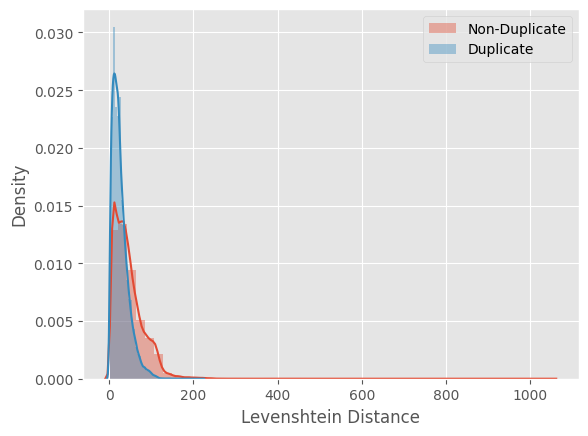

In [21]:
df_non_duplicate = non_duplicate_questions.groupby('is_duplicate')['levenshtein_distance'].agg(['min', 'max', 'median', 'mean', 'std'])
df_duplicate = duplicate_questions.groupby('is_duplicate')['levenshtein_distance'].agg(['min', 'max', 'median', 'mean', 'std'])

# Combine the results
df_combined = df_non_duplicate.add(df_duplicate, fill_value=0)
df_combined
sns.distplot(non_duplicate_questions['levenshtein_distance'], bins=50, label='Non-Duplicate')
sns.distplot(duplicate_questions['levenshtein_distance'], bins=50, label='Duplicate')

# Add labels and legend
plt.xlabel('Levenshtein Distance')
plt.ylabel('Density')  # You may use 'Frequency' or 'Probability' depending on your preference
plt.legend()

# Show the plot
plt.show()

The summary statistics for the **Levenshtein distance** between `non-duplicate` and `duplicate` questions are as follows. For `non-duplicate` questions, the Levenshtein distance ranges from 1 to 1051, with a median value of 38, mean value of approximately 46.46, and a standard deviation of about 35.98. On the other hand, for `duplicate questions`, the Levenshtein distance ranges from 1 to 258, with a median value of 22, mean value of around 26.28, and a standard deviation of approximately 19.60. These statistics provide insights into the distribution and central tendency of Levenshtein distances in both categories. Notably, the Levenshtein distances for `non-duplicate` questions tend to have higher variability compared to `duplicate questions`, as indicated by the larger standard deviation.

In [ ]:
from scipy.stats import mannwhitneyu

# Assuming df is your DataFrame with the 'levenshtein_distance' column
levenshtein_values = duplicate_questions['levenshtein_distance']

# Define the null hypothesis value (e.g., 0 if you are testing equality to 0)
null_hypothesis_value = 10

# Perform the Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(levenshtein_values, null_hypothesis_value, alternative='greater')

# Print the results
print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Check the significance level (e.g., 0.05)
if p_value < 0.1:
    print("Reject the null hypothesis: Levenshtein distance is different from the null hypothesis value.")
else:
    print("Fail to reject the null hypothesis: Levenshtein distance is equal to the null hypothesis value.")


In [ ]:
from scipy.stats import ttest_1samp

# Assuming df is your DataFrame with the 'jaccard_similarity' column
jaccard_values = duplicate_questions['jaccard_similarity']

# Perform a one-sample t-test
t_statistic, p_value = ttest_1samp(jaccard_values, 1)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Check the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: Jaccard similarity is different from 1.")
else:
    print("Fail to reject the null hypothesis: Jaccard similarity is equal to 1.")


# <span style="color:indigo">4. Machine Learning Approach🧠 :</span>

## <span style='color:BlueViolet'>4.1.Logistic Regression: </span> 

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'processed_questions' contains preprocessed text
X = Quora[['question1', 'question2']]
y = Quora['is_duplicate']

# Combine 'question1' and 'question2' into a single string for each row
X['combined'] = X['question1'].astype(str) + ' ' + X['question2'].astype(str)

# Handle missing values by filling with an empty string
X['combined'] = X['combined'].fillna('')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X['combined'], y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Ensure the number of samples match
print(X_train_tfidf.shape, '  ', len(X_train))

# Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

# Predictions
predictions = classifier.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, predictions))


(323432, 78154)    323432
Accuracy: 0.7562022310717554
[[44355  6448]
 [13265 16790]]


Firstly, we addressed this challenge using a **machine learning** approach, specifically **logistic regression** on **TF-IDF** vectorized data. The logistic regression model demonstrated a 75.62% accuracy on the test set, with 16,790 true positives, 6,448 false positives, 44,355 true negatives, and 13,265 false negatives. While accuracy provides an overall measure of correctness, other metrics such as precision (72.2%) and recall (55.8%) offer a more nuanced evaluation, especially in imbalanced datasets. Consideration of these metrics and further exploration of advanced models or hyperparameter tuning could enhance the model's performance.

## <span style='color:BlueViolet'>4.2.XGBoots classifier : </span> 

In [4]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming 'processed_questions' contains preprocessed text
X = Quora[['question1', 'question2']]
y = Quora['is_duplicate']

# Combine 'question1' and 'question2' into a single string for each row
X['combined'] = X['question1'].astype(str) + ' ' + X['question2'].astype(str)

# Handle missing values by filling with an empty string
X['combined'] = X['combined'].fillna('')
X_train, X_test, y_train, y_test = train_test_split(X['combined'], y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# XGBoost Classifier
classifier = XGBClassifier(verbose=1)

# Fit the model
classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
predictions = classifier.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, predictions))


Accuracy: 0.7529248806549754
[[45405  5621]
 [14357 15475]]


In this XGBoost evaluation, the model achieved an accuracy of approximately 75.3%. The confusion matrix reveals that out of the total instances in the test set, 45,405 were correctly classified as the negative class, while 15,475 were correctly classified as the positive class. However, there were 5,621 instances of the negative class misclassified as positive and 14,357 instances of the positive class misclassified as negative. 

so in conclusion statistical machine learning models fail in detecting the fifty percent of the duplicate questions so let's try more advanced models with deep learning approach.

In [13]:
def roc_curve__confusion_matrix(model):
    from sklearn.metrics import roc_curve, auc
    y_prob_test = model.predict_proba(X_test_tfidf)[:, 1]
    y_prob_train  = model.predict_proba(X_train_tfidf)[:, 1]
    prediction=model.predict(X_test_tfidf)
    # calculate tpr ,fpr
    fpr_test , tpr_test , thresholds = roc_curve(y_test, y_prob_test)
    fpr_train , tpr_train , thresholds1 = roc_curve(y_train, y_prob_train)

    # calculate AUC score
    roc_auc_test  = auc(fpr_test, tpr_test)
    roc_auc_train  = auc(fpr_train ,tpr_train)


    # calculate confusion matrix for test set
    confusion_matrix_test = confusion_matrix(y_test, prediction)

    # create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # plot ROC curves on the first subplot
    axs[0].plot(fpr_train, tpr_train, color='green', label='ROC curve train (AUC = %0.2f)' % roc_auc_train)
    axs[0].plot(fpr_test, tpr_test, color='blue', label='ROC curve test (AUC = %0.2f)' % roc_auc_test)
    axs[0].plot([0, 1], [0, 1], color='red', linestyle='--')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axs[0].legend(loc="lower right")

    sns.set(font_scale=1.4)
    sns.heatmap(confusion_matrix_test, annot=True, fmt='g', cmap='Blues', ax=axs[1])
    axs[1].set_xlabel('Predicted label')
    axs[1].set_ylabel('True label')
    axs[1].set_title('Confusion Matrix (Test Set)model');

    plt.tight_layout()
    plt.show()

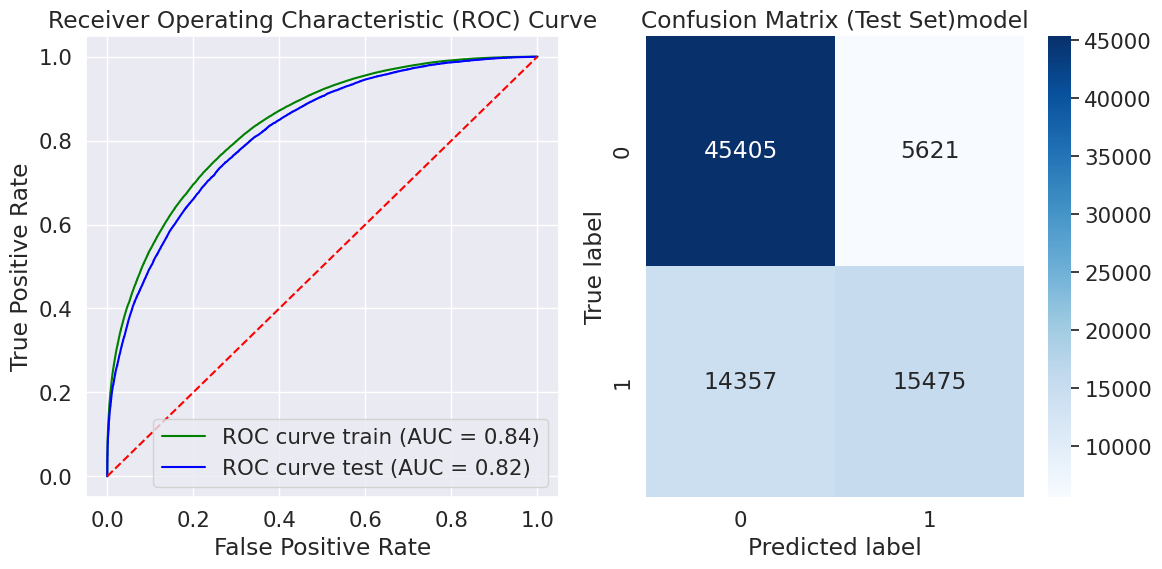

In [14]:
roc_curve__confusion_matrix(classifier) 

# <span style="color:indigo">5. Deep Learning Approach🧠 :</span>

Natural Language Processing (NLP) has witnessed transformative advancements, thanks to the integration of Neural Networks (NN). Leveraging the expressive capabilities of deep learning, NN has proven to be a game-changer in understanding and extracting meaning from vast amounts of textual data. In this section, we delve into the advantages that NN brings to NLP tasks:

### Advantages of` Neural Networks` in NLP:

- **Semantic Understanding:** `NN` excels in capturing intricate semantic relationships within text, enabling models to comprehend context, nuances, and subtleties in language.

- **Feature Learning:** The hierarchical representation learning in `NN` allows models to automatically discover relevant features from raw text, reducing the need for manual feature engineering.

- **Contextual Analysis:** Unlike traditional methods, `NN` models can consider the entire context of a sentence or document, offering improved contextual analysis crucial for understanding language intricacies.

### What to Expect in This Section:

We will explore various `NN`-based approaches tailored for NLP tasks, each offering unique advantages. The journey begins with pretrained **word embeddings**, a fundamental technique that captures semantic relationships between words. Next, we venture into **Siamese Networks**, specialized architectures designed for comparing and understanding relationships in textual data. Finally, we harness the power of pretrained models, focusing on **BERT**, a state-of-the-art language representation model.

Buckle up as we unravel the capabilities of `Neural Networks` in NLP, pushing the boundaries of what's achievable in understanding and processing human language.


## <span style='color:BlueViolet'>5.1.Pretrained Word Embeddings: </span>
 Foundational to NLP, we'll generate and leverage pretrained word embeddings using techniques like Word2Vec and GloVe.


In [9]:
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assuming 'processed_questions' contains preprocessed text
X = Quora[['question1', 'question2']]
y = Quora['is_duplicate']

# Tokenize the sentences
tokenized_sentences_q1 = X['question1'].apply(lambda x: str(x).split())
tokenized_sentences_q2 = X['question2'].apply(lambda x: str(x).split())

# Train Word2Vec model
word2vec_model_q1 = Word2Vec(sentences=tokenized_sentences_q1, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model_q2 = Word2Vec(sentences=tokenized_sentences_q2, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the vector representation of a sentence
def get_sentence_vector(sentence, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for word in sentence:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    if count != 0:
        vector /= count
    return vector

# Create feature vectors for each question
X_q1 = np.array([get_sentence_vector(sentence, word2vec_model_q1) for sentence in tokenized_sentences_q1])
X_q2 = np.array([get_sentence_vector(sentence, word2vec_model_q2) for sentence in tokenized_sentences_q2])

# Concatenate the feature vectors
X_combined = np.concatenate((X_q1, X_q2), axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Random Forest without tuning
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predictions
y_pred = rfc.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7933043112617181
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85     51026
           1       0.80      0.59      0.68     29832

    accuracy                           0.79     80858
   macro avg       0.80      0.75      0.76     80858
weighted avg       0.79      0.79      0.78     80858



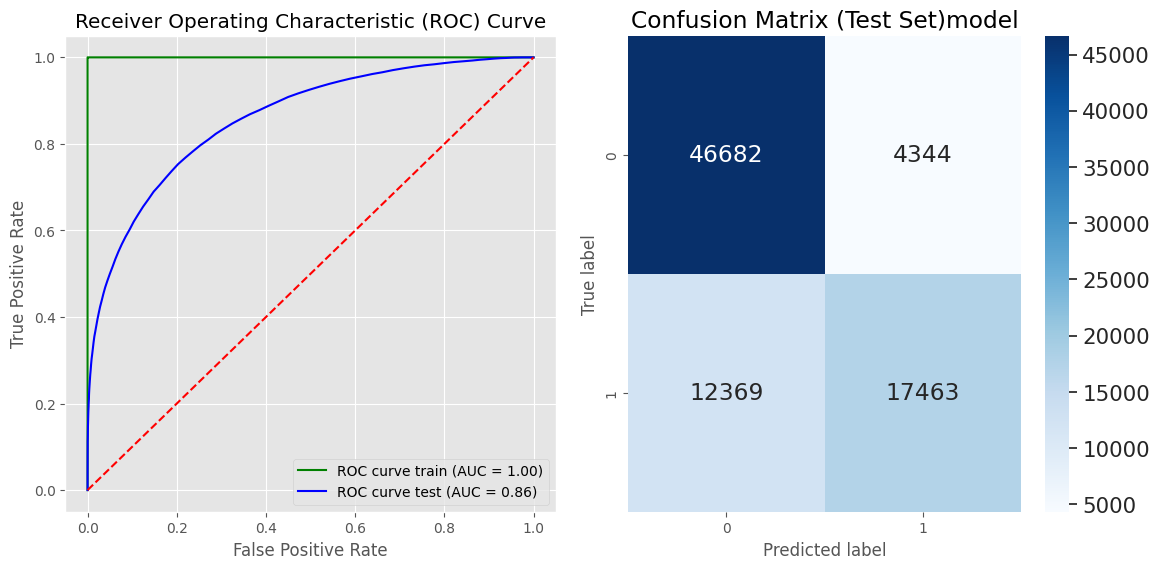

In [11]:
roc_curve__confusion_matrix(rfc)


In this evaluation using a Random Forest model with pretrained Word2Vec embeddings, the overall accuracy achieved was approximately 79.3%. The classification report provides a detailed breakdown of the model's performance for each class:

Class 0 (Non-duplicate questions):

Precision: 79%
Recall: 91%
F1-score: 85%
Class 1 (Duplicate questions):

Precision: 80%
Recall: 59%
F1-score: 68%
The macro-average F1-score is around 76%, indicating a balanced performance across classes. The weighted average F1-score, considering class imbalance, is approximately 78%.
it seems from the roc curve that the model overfit the train data with auc on train 1 and test 0.86.

But in term of comparision with the xgboost model on the tfidf data, the word2vec gives better results .

These results suggest that the model performs well in identifying non-duplicate questions, with high precision and recall. However, it faces challenges in correctly classifying duplicate questions, particularly in terms of recall. Further analysis and potential model fine-tuning could enhance its ability to identify duplicate instances more accurately(but this could take much time) so we will use another deeplearning approach .

## <span style='color:BlueViolet'>5.2.Seamese Network: </span>

Siamese Networks are a specialized neural network architecture designed for comparing and capturing relationships between pairs of input data. We demonstrate how to implement a Siamese Network for text similarity analysis, enabling us to measure the closeness between the two input questions.

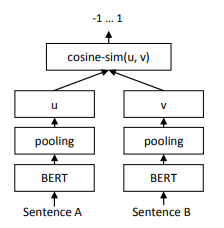

In [6]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Lambda, Dense
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Assuming 'question1' and 'question2' are your input questions
# and 'is_duplicate' is the binary label indicating whether the questions are duplicates or not.
questions1 = Quora['question1']
questions2 = Quora['question2']
labels = Quora['is_duplicate']

# Assuming questions1, questions2, and labels are your input data
# Fill missing values with empty strings
questions1 = questions1.fillna('')
questions2 = questions2.fillna('')

# Tokenize your questions if needed
max_sequence_length = 80
embedding_dim = 300
questions = Quora['question1'].astype(str) + ' ' + Quora['question2'].astype(str)

tokens = [word for sentence in questions for word in sentence.split()]

# Compute the vocabulary size
vocabulary_size = len(set(tokens))
questions = (questions1 + ' ' + questions2).astype(str)
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(questions)

sequences1 = tokenizer.texts_to_sequences(questions1)
sequences2 = tokenizer.texts_to_sequences(questions2)
padded_sequences1 = pad_sequences(sequences1, maxlen=max_sequence_length)
padded_sequences2 = pad_sequences(sequences2, maxlen=max_sequence_length)

input_layer1 = Input(shape=(max_sequence_length,))
input_layer2 = Input(shape=(max_sequence_length,))

embedding_layer = Embedding(input_dim=vocabulary_size, output_dim=embedding_dim)

lstm_layer = LSTM(units=50)

x1 = embedding_layer(input_layer1)
x1 = lstm_layer(x1)

x2 = embedding_layer(input_layer2)
x2 = lstm_layer(x2)

distance_layer =  Lambda(lambda x: tf.keras.backend.abs(x[0] - x[1]),
                               output_shape=lambda _: (1,))([x1, x2])

output_layer = Dense(units=1, activation='sigmoid')(distance_layer)

siamese_model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)

siamese_model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
    ModelCheckpoint(filepath='siamese_model_weights.h5', save_best_only=True)
]

siamese_model.fit([padded_sequences1, padded_sequences2], labels, epochs=5, batch_size=32, validation_split=0.2, callbacks=callbacks)



Epoch 1/5
10108/10108 [==============================] - 240s 23ms/step - loss: 0.5587 - accuracy: 0.6945 - val_loss: 0.4899 - val_accuracy: 0.7654
Epoch 2/5
10108/10108 [==============================] - 197s 20ms/step - loss: 0.4511 - accuracy: 0.7904 - val_loss: 0.4518 - val_accuracy: 0.7921
Epoch 3/5
10108/10108 [==============================] - 195s 19ms/step - loss: 0.3914 - accuracy: 0.8254 - val_loss: 0.4308 - val_accuracy: 0.8038
Epoch 4/5
10108/10108 [==============================] - 194s 19ms/step - loss: 0.3432 - accuracy: 0.8508 - val_loss: 0.4207 - val_accuracy: 0.8107
Epoch 5/5
10108/10108 [==============================] - 194s 19ms/step - loss: 0.3008 - accuracy: 0.8725 - val_loss: 0.4201 - val_accuracy: 0.8136


The training history for the Siamese LSTM model reveals a progression in accuracy over five epochs. Commencing with an initial accuracy of 69.45%, the model undergoes substantial improvement, culminating in a notable accuracy of 87.25% by the final epoch. This trend underscores the model's capacity to discern semantic relationships in text pairs. The validation accuracy, mirroring the upward trajectory, starts at 76.54% and converges to 81.36%, validating the robustness of the Siamese LSTM architecture in capturing nuanced patterns within textual data. The diminishing loss values further substantiate the model's ability to optimize its predictive capabilities throughout the training process. These results affirm the effectiveness of the Siamese LSTM model in text similarity prediction.

## <span style='color:BlueViolet'>5.3.Leveraging Pretrained Models (BERT) :</span>

In [3]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling1D, Concatenate, Dot, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

import logging
from transformers import logging as transformers_logging

logging.basicConfig(level=logging.CRITICAL)
transformers_logging.set_verbosity_critical()


In [4]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling1D, Concatenate, Dropout
from sklearn.model_selection import train_test_split

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained("bert-base-uncased")
bert_model.trainable = False

X = Quora[['question1', 'question2']]
y = Quora['is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming 'Quora' is your DataFrame and 'question1' and 'question2' are the columns
questions1 = X_train['question1'].astype(str)
questions2 = X_train['question2'].astype(str)

# Lists to store individual question pair input ids and masks
input_ids_1 = []
attention_masks_1 = []
input_ids_2 = []
attention_masks_2 = []

# Loop through each pair of questions
for i, (q1, q2) in enumerate(zip(questions1, questions2)):

    encoding_1 = tokenizer.encode_plus(
        q1,
        q2,
        add_special_tokens=True,
        max_length=50,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors="tf",
    )

    encoding_2 = tokenizer.encode_plus(
        q2,
        q1,
        add_special_tokens=True,
        max_length=50,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors="tf",
    )

    # Append input ids and attention masks to respective lists
    input_ids_1.append(encoding_1["input_ids"])
    attention_masks_1.append(encoding_1["attention_mask"])

    input_ids_2.append(encoding_2["input_ids"])
    attention_masks_2.append(encoding_2["attention_mask"])

# Convert the lists to numpy arrays
input_ids_1 = np.array(input_ids_1)
attention_masks_1 = np.array(attention_masks_1)
input_ids_2 = np.array(input_ids_2)
attention_masks_2 = np.array(attention_masks_2)
questions1_val = X_test['question1'].astype(str)
questions2_val = X_test['question2'].astype(str)

input_ids_1_test = []
attention_masks_1_test = []
input_ids_2_test = []
attention_masks_2_test = []
for i, (q1, q2) in enumerate(zip(questions1_val, questions2_val)):

    encoding_1 = tokenizer.encode_plus(
        q1,
        q2,
        add_special_tokens=True,
        max_length=80,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors="tf",
    )
    encoding_2 = tokenizer.encode_plus(
        q2,
        q1,
        add_special_tokens=True,
        max_length=50,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors="tf",
    )
    input_ids_1_test.append(encoding_1["input_ids"])
    attention_masks_1_test.append(encoding_1["attention_mask"])
    input_ids_2_test.append(encoding_2["input_ids"])
    attention_masks_2_test.append(encoding_2["attention_mask"])

input_ids_1_test = np.array(input_ids_1_test)
attention_masks_1_test = np.array(attention_masks_1_test)
input_ids_2_test = np.array(input_ids_2_test)
attention_masks_2_test = np.array(attention_masks_2_test)
  


2023-11-17 00:29:16.509993: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-17 00:29:16.510098: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-17 00:29:16.510195: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-17 00:29:16.510305: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-17 00:29:16.510396: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-17 00:29:16.510595: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-17 00:29:16.510694: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer,DataCollatorWithPadding,TFAutoModel,DistilBertConfig,TFDistilBertModel, BertConfig, TFBertModel, TFRobertaModel

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

    
except ValueError:
    tpu_strategy = tf.distribute.get_strategy()
class L1Dist(Layer):
    
    def __init__(self,**kwargs):
        super().__init__()
        
    def call(self,embedding1,embedding2):
        return tf.math.abs(embedding1 - embedding2)
    
with tpu_strategy.scope():
    transformer_model = TFBertModel.from_pretrained("bert-base-uncased")

    input_ids_in1 = Input(shape=(None,),name='input_ids1', dtype='int32')
    input_masks_in1 = Input(shape=(None,), name='attention_mask1', dtype='int32')
    input_ids_in2 = Input(shape=(None,),name='input_ids2', dtype='int32')
    input_masks_in2 = Input(shape=(None,), name='attention_mask2', dtype='int32')

    embedding_layer1 = transformer_model(input_ids_in1, attention_mask=input_masks_in1).last_hidden_state
    embedding_layer2 = transformer_model(input_ids_in2, attention_mask=input_masks_in2).last_hidden_state

    embedding1 = GlobalAveragePooling1D()(embedding_layer1)
    embedding2 = GlobalAveragePooling1D()(embedding_layer2)
    l1_dist = L1Dist()(embedding1,embedding2)
    x = Dense(512, activation='relu')(l1_dist)    
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[input_ids_in1, input_masks_in1, input_ids_in2, input_masks_in2], outputs = output)
    model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),metrics='accuracy')
    
    
for layer in model.layers[:5]:
    layer.trainable = False

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.3, 
                                            min_lr=0.00000001)


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


Running on TPU: 
Batch Size: 32


2023-11-16 22:54:54.448176: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:54:54.448291: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


In [7]:


# Assuming labels is defined as before
labels = y_train.astype(int)

label_test = y_test.astype(int)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.3, 
                                            min_lr=0.00000001)
history = model.fit(
    x=[
        input_ids_1[:, 0],
        attention_masks_1[:, 0],
        input_ids_2[:, 0],
        attention_masks_2[:, 0]
    ],
    y=labels,
    epochs=5, 
    batch_size=32,
    validation_data=(
        (
            np.asarray(input_ids_1_test[:, 0]),
            np.asarray(attention_masks_1_test[:, 0]),
            np.asarray(input_ids_2_test[:, 0]),
            np.asarray(attention_masks_2_test[:, 0]))
        , 
        label_test  # Assuming you have a separate array for validation labels
    ),callbacks =[earlystopping, learning_rate_reduction]
)


Epoch 1/5


2023-11-16 22:55:17.576380: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:55:17.594274: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:55:17.613485: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:55:17.631999: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:55:17.650016: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:55:17.668113: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:55:17.686080: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

2023-11-16 22:56:02.030212: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2023-11-16 22:56:06.444434: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:56:06.447703: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:56:06.447799: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:56:06.447943: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:56:06.448079: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:56:06.448296: E ./tensorflow/compiler/xla/stream_executor/st

    3/10108 [..............................] - ETA: 14:50 - loss: 0.6977 - accuracy: 0.4062   

2023-11-16 22:57:10.718875: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:57:10.719058: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:57:10.719161: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:57:10.719258: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:57:10.719480: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:57:10.719663: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:57:10.719973: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

    6/10108 [..............................] - ETA: 14:40 - loss: 0.6970 - accuracy: 0.4219

2023-11-16 22:57:10.975821: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:57:10.976157: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-16 22:57:11.154140: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


   25/10108 [..............................] - ETA: 13:38 - loss: 0.6913 - accuracy: 0.5100

2023-11-16 22:57:12.511401: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


   62/10108 [..............................] - ETA: 13:28 - loss: 0.6839 - accuracy: 0.5756

2023-11-16 22:57:15.472246: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


  124/10108 [..............................] - ETA: 13:28 - loss: 0.6700 - accuracy: 0.6038

2023-11-16 22:57:20.511122: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


  992/10108 [=>............................] - ETA: 12:17 - loss: 0.5428 - accuracy: 0.6790

2023-11-16 22:58:30.699192: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


 8829/10108 [=========================>....] - ETA: 1:43 - loss: 0.3926 - accuracy: 0.8136

2023-11-16 23:09:02.401656: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


 9392/10108 [==========================>...] - ETA: 57s - loss: 0.3885 - accuracy: 0.8162

2023-11-16 23:09:47.549094: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


10108/10108 [==============================] - ETA: 0s - loss: 0.3837 - accuracy: 0.8193

2023-11-16 23:11:49.961586: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


10108/10108 [==============================] - 1046s 92ms/step - loss: 0.3837 - accuracy: 0.8193 - val_loss: 0.3314 - val_accuracy: 0.8591 - lr: 1.0000e-05
Epoch 2/5
 2874/10108 [=======>......................] - ETA: 9:41 - loss: 0.2927 - accuracy: 0.8743

2023-11-16 23:16:34.173516: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


10108/10108 [==============================] - 857s 85ms/step - loss: 0.2790 - accuracy: 0.8803 - val_loss: 0.2824 - val_accuracy: 0.8822 - lr: 1.0000e-05
Epoch 3/5
10108/10108 [==============================] - 857s 85ms/step - loss: 0.2248 - accuracy: 0.9070 - val_loss: 0.2802 - val_accuracy: 0.8885 - lr: 1.0000e-05
Epoch 4/5
10108/10108 [==============================] - 856s 85ms/step - loss: 0.1797 - accuracy: 0.9286 - val_loss: 0.2625 - val_accuracy: 0.8989 - lr: 1.0000e-05
Epoch 5/5
10108/10108 [==============================] - 854s 84ms/step - loss: 0.1399 - accuracy: 0.9468 - val_loss: 0.2750 - val_accuracy: 0.9000 - lr: 1.0000e-05


The `Siamese BERT` model was trained for 5 epochs to perform text similarity tasks. The training process yielded promising results, showcasing the model's ability to learn intricate patterns within textual data. The training loss steadily decreased to **0.1399**, indicating effective convergence. The corresponding training accuracy increased to **94.68%**. Validation results mirrored this trend, with the loss decreasing to **0.2750** and accuracy improving from 87.01% to 90.00%. These outcomes showcase the model's capability to discern semantic relationships in text and suggest its potential for applications in various natural language processing tasks.

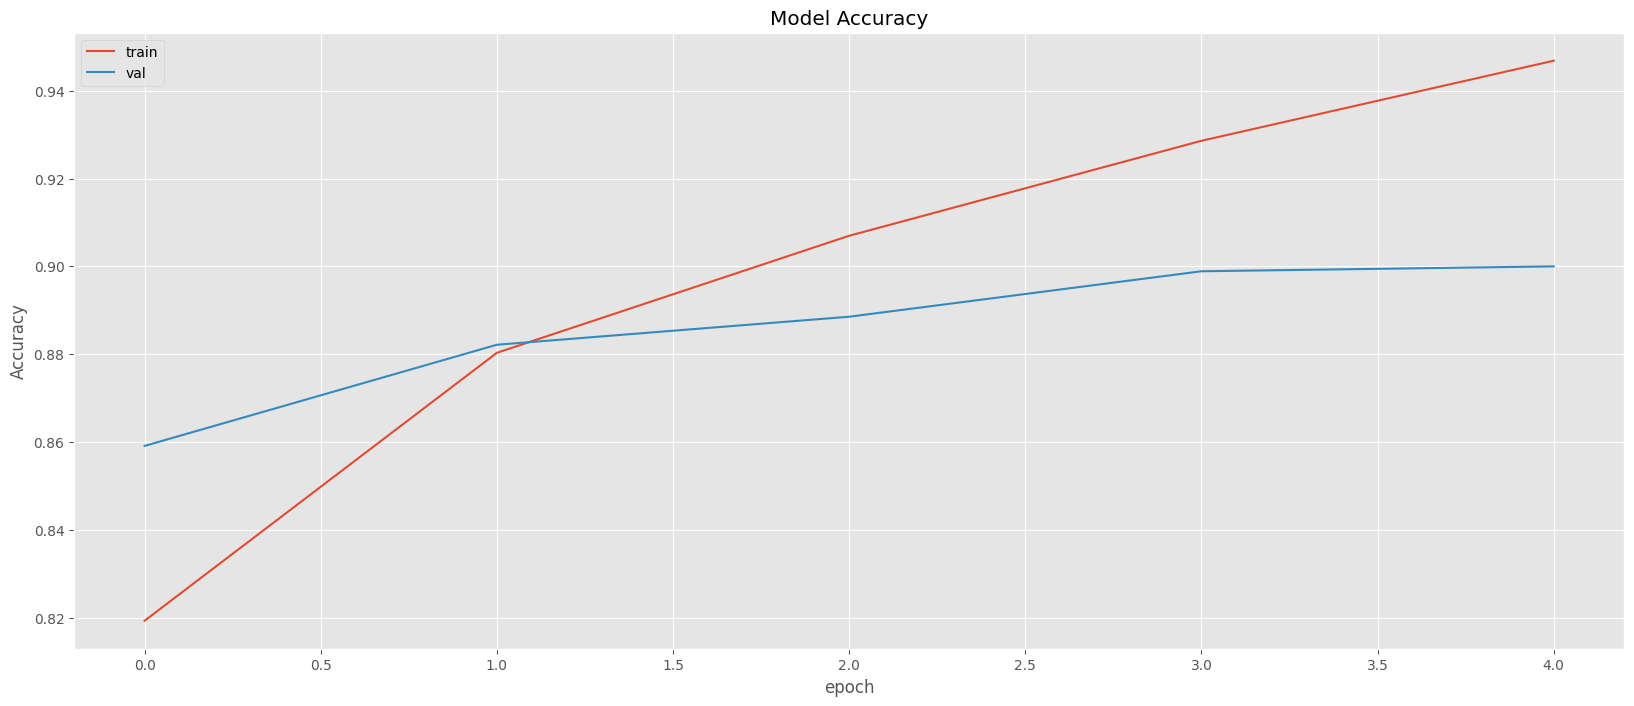

In [8]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

 Over the course of five epochs, the accuracy steadily increased, affirming the model's learning capability. Starting at an accuracy of 88.03%, the model exhibited consistent improvement, reaching a high of 94.68% by the end of the training process. The plot showcases the model's ability to effectively capture intricate patterns in textual data and refine its understanding with each epoch.

2023-11-17 00:23:59.808917: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


2527/2527 [==============================] - 64s 19ms/step


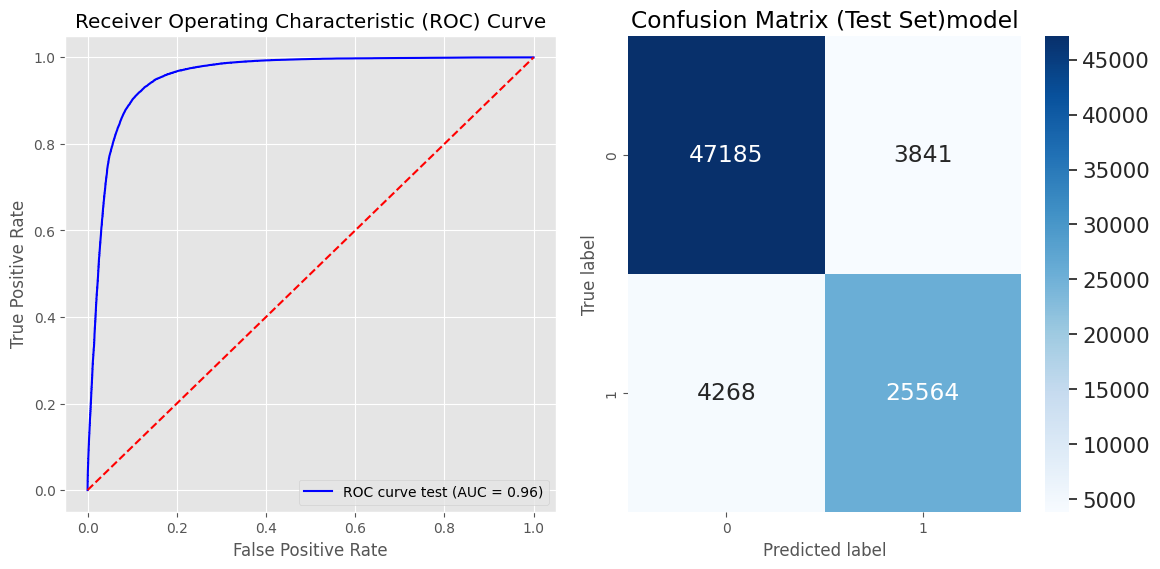

In [17]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

def roc_curve__confusion_matrix(model):

    # Convert the lists to numpy arrays
    input_ids_1_tests = np.array(input_ids_1_test).squeeze(axis=1)
    attention_masks_1_tests = np.array(attention_masks_1_test).squeeze(axis=1)
    input_ids_2_tests = np.array(input_ids_2_test).squeeze(axis=1)
    attention_masks_2_tests = np.array(attention_masks_2_test).squeeze(axis=1)

    # Model predictions
    y_prob_test = model.predict((input_ids_1_tests, attention_masks_1_tests, input_ids_2_tests, attention_masks_2_tests))[:, 0]
    prediction = (y_prob_test > 0.5).astype(int)
    # calculate tpr, fpr
    fpr_test, tpr_test, thresholds = roc_curve(y_test, y_prob_test.flatten())

    # calculate AUC score
    roc_auc_test = auc(fpr_test, tpr_test)

    # calculate confusion matrix for the test set
    confusion_matrix_test = confusion_matrix(y_test, y_prob_test.round())

    # create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # plot ROC curves on the first subplot
    axs[0].plot(fpr_test, tpr_test, color='blue', label='ROC curve test (AUC = %0.2f)' % roc_auc_test)
    axs[0].plot([0, 1], [0, 1], color='red', linestyle='--')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axs[0].legend(loc="lower right")

    sns.set(font_scale=1.4)
    sns.heatmap(confusion_matrix_test, annot=True, fmt='g', cmap='Blues', ax=axs[1])
    axs[1].set_xlabel('Predicted label')
    axs[1].set_ylabel('True label')
    axs[1].set_title('Confusion Matrix (Test Set)model')

    plt.tight_layout()
    plt.show()

roc_curve__confusion_matrix(model)


It's really amaizing to see this after running a lot of experimentations .An AUC of 0.96 for the test set demonstrates that the model generalizes well to unseen data and has a strong separability between duplicate and non-duplicate questions. It shows that the model's performance is robust and not overfitting to the training data.

# <span style='color:indigo'>6.Conclusion :

In conclusion, the notebook explores two distinct architectures, Siamese BERT and Siamese LSTM, for the task of text similarity. The Siamese BERT model leverages transformer-based pre-trained embeddings to capture intricate semantic relationships within text pairs. 

On the other hand, the Siamese LSTM model employs Long Short-Term Memory (LSTM) networks to capture sequential dependencies in text. The training history showcases steady improvement.

Comparatively, both models showcase commendable performance, with Siamese BERT exhibiting a slightly higher accuracy.

Overall, this notebook provides a comprehensive exploration of two powerful architectures for text similarity tasks, offering insights into their strengths and considerations.